# Ingestão de dados do Censo Superior

arquivos disponíveis em:
- https://download.inep.gov.br/microdados/microdados_censo_da_educacao_superior_2020.zip
- https://download.inep.gov.br/microdados/microdados_censo_da_educacao_superior_2015.zip

In [2]:
# !pip install pandas
#import pandas as pd


In [ ]:
#Mapeamento das URLs de dados do censo superior

url = 'https://download.inep.gov.br/microdados/microdados_censo_da_educacao_superior_2020.zip'

url = 'https://download.inep.gov.br/microdados/microdados_censo_da_educacao_superior_2015.zip'

#2020
#QT_CONC

#2015
#QT_ING

In [ ]:
import os 

# staging area
#sa_dir = 'C:/Users/209-29/inep/censo_superior'

for t in [2015,2020]:
    arq = f'{sa_dir}/{t}/MICRODADOS_CADASTRO_CURSOS_{t}.CSV'
    print(arq)

d = pd.read_csv(arq, delimiter= ';', encoding='ISO-8859-1')
#Quando aparecer erro utf-8, colocar o encoding
d.head()

#print(f)
#os.listdir(f)csv


In [3]:
#Importação seletiva
from pandas import read_csv

sa_dir = 'C:/Users/209-29/inep/censo_superior'
ano = 2020
arq = f'{sa_dir}/{ano}/MICRODADOS_CADASTRO_CURSOS_{ano}.CSV'

colunas = ['NU_ANO_CENSO', 'SG_UF','CO_UF', 'CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_MODALIDADE_ENSINO', 'QT_ING', 'QT_CONC']

#FIXME: comendo fundamental!
#help(read_csv)

d2020 = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols= colunas)

ano=2015
arq = f'{sa_dir}/{ano}/MICRODADOS_CADASTRO_CURSOS_{ano}.CSV'
d2015 = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols= colunas)

d2015.head(5)

NU_ANO_CENSO SG_UF  CO_UF  TP_CATEGORIA_ADMINISTRATIVA  CO_IES  \
0          2015    MT   51.0                            1       1   
1          2015    MT   51.0                            1       1   
2          2015    MT   51.0                            1       1   
3          2015    MT   51.0                            1       1   
4          2015    MT   51.0                            1       1   

   TP_MODALIDADE_ENSINO  QT_ING  QT_CONC  
0                     2       0        0  
1                     2       0        0  
2                     2       0        0  
3                     2       0        0  
4                     2       0        0

In [4]:
#Inspecionar os dados de 2015
#Corrigir tipagem
d2015['CO_UF'] = d2015.CO_UF.fillna(0).astype(int)
d2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77897 entries, 0 to 77896
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   NU_ANO_CENSO                 77897 non-null  int64 
 1   SG_UF                        76466 non-null  object
 2   CO_UF                        77897 non-null  int32 
 3   TP_CATEGORIA_ADMINISTRATIVA  77897 non-null  int64 
 4   CO_IES                       77897 non-null  int64 
 5   TP_MODALIDADE_ENSINO         77897 non-null  int64 
 6   QT_ING                       77897 non-null  int64 
 7   QT_CONC                      77897 non-null  int64 
dtypes: int32(1), int64(6), object(1)
memory usage: 4.5+ MB


In [5]:
#Inspecionar os dados de 2020
#Corrigir tipagem
d2020['CO_UF'] = d2020.CO_UF.fillna(0).astype(int)
d2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335629 entries, 0 to 335628
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   NU_ANO_CENSO                 335629 non-null  int64 
 1   SG_UF                        329460 non-null  object
 2   CO_UF                        335629 non-null  int32 
 3   TP_CATEGORIA_ADMINISTRATIVA  335629 non-null  int64 
 4   CO_IES                       335629 non-null  int64 
 5   TP_MODALIDADE_ENSINO         335629 non-null  int64 
 6   QT_ING                       335629 non-null  int64 
 7   QT_CONC                      335629 non-null  int64 
dtypes: int32(1), int64(6), object(1)
memory usage: 19.2+ MB


In [6]:
#Estatística Descritiva de todas as colunas
d2020.describe(include="all")

NU_ANO_CENSO   SG_UF          CO_UF  TP_CATEGORIA_ADMINISTRATIVA  \
count       335629.0  329460  335629.000000                335629.000000   
unique           NaN      27            NaN                          NaN   
top              NaN      SP            NaN                          NaN   
freq             NaN   66264            NaN                          NaN   
mean          2020.0     NaN      33.354356                     4.032739   
std              0.0     NaN      10.552603                     0.682750   
min           2020.0     NaN       0.000000                     1.000000   
25%           2020.0     NaN      29.000000                     4.000000   
50%           2020.0     NaN      35.000000                     4.000000   
75%           2020.0     NaN      41.000000                     4.000000   
max           2020.0     NaN      53.000000                     7.000000   

               CO_IES  TP_MODALIDADE_ENSINO         QT_ING        QT_CONC  
count   335629.000000         335629.000000  335629.000000  335629.000000  
unique            NaN                   NaN            NaN            NaN  
top               NaN                   NaN            NaN            NaN  
freq              NaN                   NaN            NaN            NaN  
mean      1458.560071              1.901406      11.219737       3.810025  
std       2645.015238              0.298117      46.363861      21.990955  
min          1.000000              1.000000       0.000000       0.000000  
25%        322.000000              2.000000       1.000000       0.000000  
50%       1107.000000              2.000000       2.000000       0.000000  
75%       1491.000000              2.000000       6.000000       1.000000  
max      25352.000000              2.000000    5000.000000    2520.000000

In [71]:
from pandas import read_excel

d = read_excel ('C:/Users/209-29/projeto/app-tpad2-cdn/exemplo.xlsx', sheet_name=1, na_values='--')
d

ano  faturamento
0  1995          NaN
1  2000         10.0
2  2005         21.0
3  2010         30.0
4  2015         33.0
5  2020         30.0

In [17]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ano          6 non-null      int64  
 1   faturamento  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 224.0 bytes


In [22]:
#copiar e colar tabela
from pandas import read_clipboard

read_clipboard()

ano faturamento
0  1995          --
1  2000          10
2  2005          21
3  2010          30
4  2015          33
5  2020          30

In [55]:
#Média
#print(d.faturamento.sum(), len(d.faturamento))
media = (d.faturamento.sum()/len(d.faturamento))
media
#d.faturamento.mean()


20.666666666666668

In [36]:
# Mediana
d.faturamento.dropna().sort_values().iloc[2]
d.faturamento.median()

30.0

<AxesSubplot: >

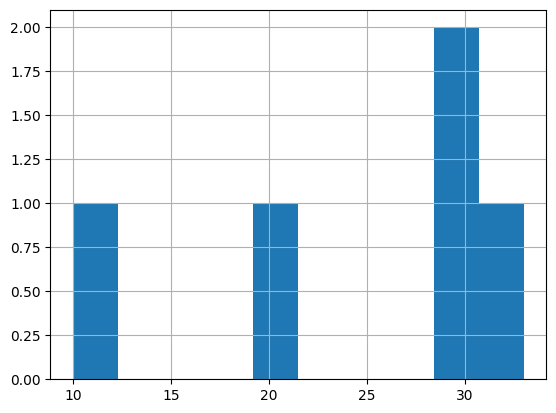

In [42]:
#Histograma
d.faturamento.hist()

In [43]:
# Amplitude
d.faturamento.max()-d.faturamento.min()

23.0

In [44]:
# Desvio padrão
d.faturamento.std()
(d.faturamento.var())**0.5

9.418067742376882

In [56]:
# variância
(sum((d.faturamento.dropna()-media)**2)/4)**0.5
#d.faturamento.var()

10.49073665457081

In [57]:
# Covariância
d.faturamento.cov(d.ano)

65.0

In [60]:
# Correlação
d.faturamento.corr(d.ano)

0.872994561234997

In [68]:
# Quantis
q3 = d.faturamento.quantile(0.75)
q1 = d.faturamento.quantile(0.25)

IIQ = q3-q1
IIQ

9.0

In [69]:
print (d.faturamento.median(), d.faturamento.mean())

30.0 24.8


In [70]:
d.describe()

ano  faturamento
count     6.000000     5.000000
mean   2007.500000    24.800000
std       9.354143     9.418068
min    1995.000000    10.000000
25%    2001.250000    21.000000
50%    2007.500000    30.000000
75%    2013.750000    30.000000
max    2020.000000    33.000000

In [73]:
# TAXA DE EVASÃO
#d2020.QT_CONC
#d2015.QT_ING
# Merge ou empilhamento para juntar as duas tabelas
from pandas import concat

concat((d2015,d2020))

NU_ANO_CENSO SG_UF  CO_UF  TP_CATEGORIA_ADMINISTRATIVA  CO_IES  \
0               2015    MT     51                            1       1   
1               2015    MT     51                            1       1   
2               2015    MT     51                            1       1   
3               2015    MT     51                            1       1   
4               2015    MT     51                            1       1   
...              ...   ...    ...                          ...     ...   
335624          2020    MT     51                            1   25352   
335625          2020    MT     51                            1   25352   
335626          2020    MT     51                            1   25352   
335627          2020    MT     51                            1   25352   
335628          2020    MT     51                            1   25352   

        TP_MODALIDADE_ENSINO  QT_ING  QT_CONC  
0                          2       0        0  
1                          2       0        0  
2                          2       0        0  
3                          2       0        0  
4                          2       0        0  
...                      ...     ...      ...  
335624                     1      40       17  
335625                     1      63       18  
335626                     1      55       10  
335627                     1      46        6  
335628                     1      21       18  

[413526 rows x 8 columns]

In [78]:
# MERGE
# Agrupar, sintetizar e combinar

t1 = d2020.groupby(['CO_IES','CO_UF']).agg(QT_CONC = ('QT_CONC','sum')).reset_index()
t0 = d2015.groupby(['CO_IES','CO_UF']).agg(QT_ING = ('QT_ING','sum')).reset_index()
t0.merge(t1, on = ['CO_IES','CO_UF'], how = 'inner')

CO_IES  CO_UF  QT_ING  QT_CONC
0          1      0       0        0
1          1     51    5753      805
2          2      0       0        0
3          2     12       0        4
4          2     17       0        0
...      ...    ...     ...      ...
2564   19862     35      81       36
2565   19863     35      82       51
2566   20478     35      70       32
2567   21095     33     512      435
2568   21206     33      43      138

[2569 rows x 4 columns]